#  The Office(US) TV Show ~ Exploratory Data Analysis

**[About:](https://en.wikipedia.org/wiki/The_Office_(American_TV_series))**
   <p>The Office is an American mockumentary sitcom television series that depicts the everyday work lives of office employees at the Scranton, Pennsylvania, branch of the fictional Dunder Mifflin Paper Company. It aired on NBC from March 24, 2005, to May 16, 2013, spanning a total of nine seasons.</p>
   
![The Office](http://4.bp.blogspot.com/-XnRa5HoSlZY/TXBZwqT37SI/AAAAAAAAEYo/jrwFWadzQiM/s1600/michaelscottslastsupper.jpg)
   
   

## Datsets  

1. the_office_series.csv which contains information about: id, Season, EpisodeTitle,	About,	Ratings,	Votes,	Viewership,	Duration,	Date,	GuestStars,	Director and Writers.  
    - By using the above dataset I answered "Top 10s" and "Average" of The Office Show.
2. the_office_lines_scripts.csv contains information about: id,	season,	episode,	scene,	line_text,	speaker,	deleted.  
    - Where is the fun if I just figure what "Top 10s" and "Average", when this thought struck me I stumbled upon this awesome dataset which consists of The Office scripts; by using this dataset I retrieved few of the casts iconic lines as well as the words they used frequently.
    
Source and credits for the dataset:
- [the_office_lines_scripts](https://data.world/abhinavr8/the-office-scripts-dataset)
- [the_office_series](https://www.kaggle.com/datasets/nehaprabhavalkar/the-office-dataset)
- Inspired by  [Neha Prabhavalkar](https://www.kaggle.com/datasets/nehaprabhavalkar/the-office-dataset)

Acknowledgment and credits for the gifs and images used:
- [GIPHY](https://giphy.com/search/the-office)
- [TENOR](https://tenor.com/view/facts-dwight-facts-the-office-dwight-gif-25782901)
- [culturepopped](http://culturepopped.blogspot.com/2011/03/office-last-supper.html?m=1)



    


In [1]:
## Importing required Library
import re
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
import csv
from functools import partial
from pandasql import sqldf
from sklearn import datasets
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
%matplotlib widget

In [3]:
%matplotlib inline

In [4]:
import seaborn as sns
sns.set_style('whitegrid', {'title.color':'#243665'})
import warnings
warnings.filterwarnings('ignore')

In [5]:
import plotly.io as pio
pio.renderers.default = "png"

In [7]:
# importing csv file
series_df = pd.read_csv("the_office_series.csv")


In [8]:
scripts__df = pd.read_csv("the_office_lines_scripts.csv")


In [9]:
gpandsql = partial(sqldf, env=globals())

## Top 10 Highest-rated Episodes 

In [10]:
top_episodes_ratings = gpandsql("""
with cte1 as (SELECT Season, EpisodeTitle, MAX(Ratings) AS top_10_episodes
FROM series_df
GROUP BY Season, EpisodeTitle
ORDER BY top_10_episodes DESC
LIMIT 10)

select Season,EpisodeTitle, top_10_episodes
from cte1
"""
)
top_episodes_ratings

,Season,EpisodeTitle,top_10_episodes
0,7,"Goodbye, Michael",9.8
1,9,Finale,9.8
2,5,Stress Relief,9.7
3,4,Dinner Party,9.5
4,9,A.A.R.M.,9.5
5,2,Casino Night,9.4
6,6,Niagara: Part 1,9.4
7,6,Niagara: Part 2,9.4
8,7,Threat Level Midnight,9.4
9,3,The Job,9.3


(9.0, 10.0)

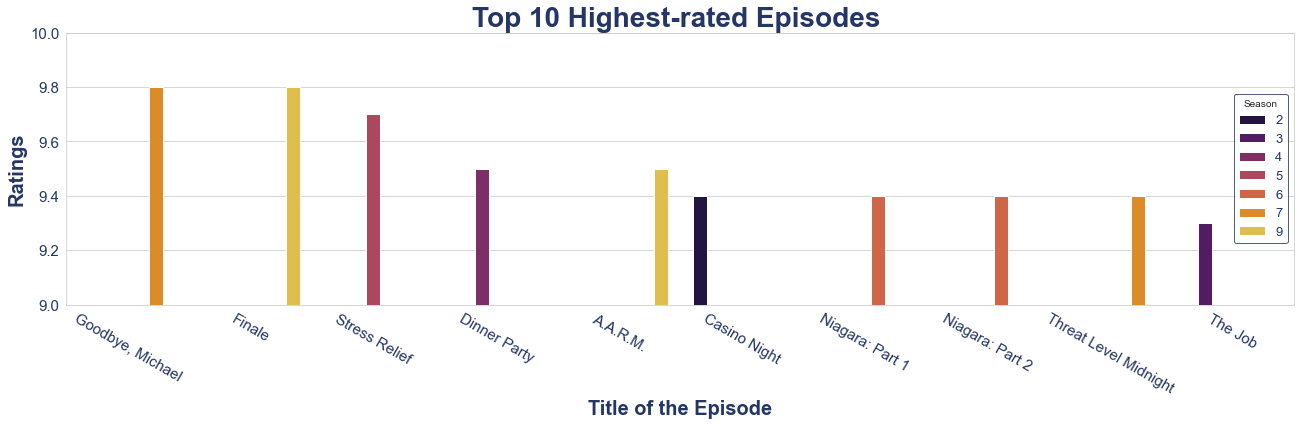

In [11]:
plt.figure(figsize=(22,5))
sns.barplot(x=top_episodes_ratings.EpisodeTitle, y=top_episodes_ratings.top_10_episodes, palette='inferno', hue = top_episodes_ratings.Season)
plt.title('Top 10 Highest-rated Episodes ', fontsize=28, fontweight='bold', color = '#243665')
plt.legend(labelcolor = '#243665', edgecolor='#243665', loc='center right', title='Season', fontsize=13)
plt.xlabel('Title of the Episode', fontsize=20, fontweight='bold', color = '#243665')
plt.ylabel('Ratings', fontsize=20, fontweight='bold', color = '#243665')
plt.xticks(fontsize=15, rotation =-30, color = '#243665')
plt.yticks(fontsize=15, color = '#243665')
plt.ylim(9, 10)

## Top 10 most viewed Episodes 

In [12]:
top_10_viewed_episodes = gpandsql("""
    with cte1 as (SELECT Season, EpisodeTitle, MAX(Viewership) AS top_10_viewed_episodes
FROM series_df
GROUP BY Season, EpisodeTitle
ORDER BY top_10_viewed_episodes DESC
LIMIT 10)

select  Season, EpisodeTitle, top_10_viewed_episodes
from cte1

"""
)
top_10_viewed_episodes

,Season,EpisodeTitle,top_10_viewed_episodes
0,5,Stress Relief,22.91
1,1,Pilot,11.20
2,2,The Injury,10.30
3,3,The Return,10.20
4,3,Traveling Salesmen,10.12
5,3,Ben Franklin,10.11
6,4,Chair Model,9.81
7,2,Christmas Party,9.70
8,4,Fun Run,9.70
9,6,Niagara: Part 1,9.42


(0.0, 25.0)

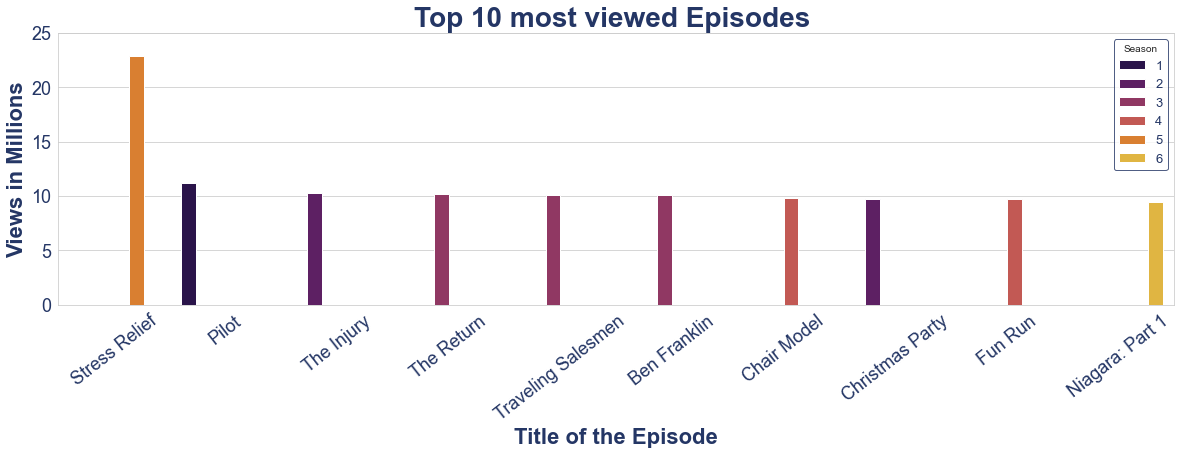

In [13]:
plt.figure(figsize=(20,5))

sns.barplot(x=top_10_viewed_episodes.EpisodeTitle, y=top_10_viewed_episodes.top_10_viewed_episodes, palette='inferno', hue = top_10_viewed_episodes.Season)
plt.title('Top 10 most viewed Episodes ', fontsize=28, fontweight='bold', color = '#243665')
plt.legend(labelcolor = '#243665', edgecolor='#243665', title='Season', fontsize=13)

plt.xlabel('Title of the Episode', fontsize=22, color = '#243665', fontweight='bold')
plt.ylabel('Views in Millions', fontsize=22, color = '#243665', fontweight='bold')
plt.xticks(np.arange(0,10,1),fontsize=18, color = '#243665', rotation =38)
plt.yticks(fontsize=18, color = '#243665')
plt.ylim(top=25)


## No. of episodes for each season

In [14]:
no_episode_season = gpandsql("""
    SELECT Season, COUNT(EpisodeTitle) AS No_Ep
FROM series_df
GROUP BY Season
ORDER BY Season 
"""
)
no_episode_season

,Season,No_Ep
0,1,6
1,2,22
2,3,23
3,4,14
4,5,26
5,6,26
6,7,24
7,8,24
8,9,23


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(0, 1, '2'),
  Text(0, 2, '3'),
  Text(0, 3, '4'),
  Text(0, 4, '5'),
  Text(0, 5, '6'),
  Text(0, 6, '7'),
  Text(0, 7, '8'),
  Text(0, 8, '9')])

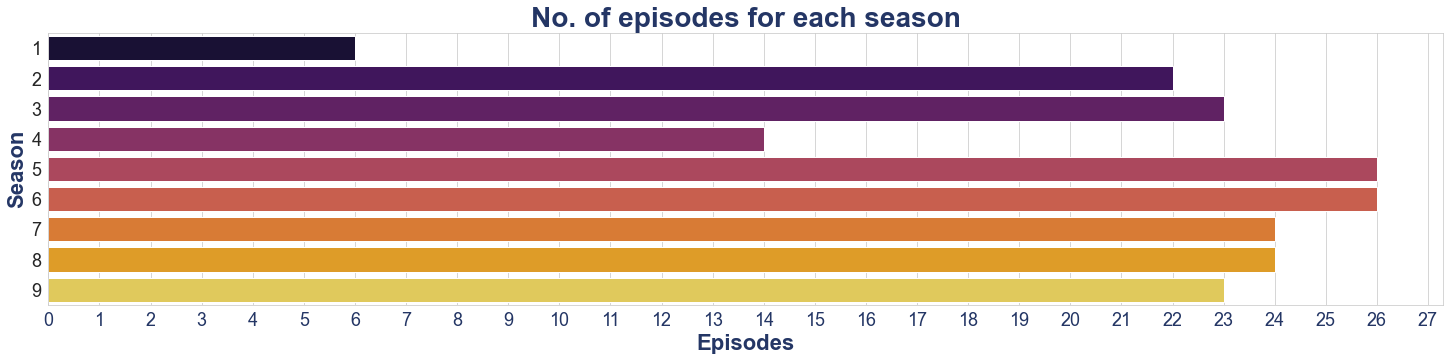

In [15]:
plt.figure(figsize=(25,5))
sns.barplot(y=no_episode_season.Season, x=no_episode_season.No_Ep, palette='inferno', orient = 'h')
plt.title('No. of episodes for each season', fontsize=28, fontweight='bold', color = '#243665')
plt.xlabel('Episodes', fontsize=22, fontweight='bold', color = '#243665')
plt.ylabel('Season', fontsize=22, fontweight='bold', color = '#243665')
plt.xticks(np.arange(0,28,1),fontsize=18, color = '#243665')
plt.yticks(fontsize=18)


## Average Ratings for each Season

In [16]:
avg_r_season = gpandsql("""
    WITH cte1 as (SELECT DISTINCT Season as Season,  AVG(Ratings) OVER(PARTITION BY Season) AS No_Ep
FROM series_df
ORDER BY Season)

SELECT Season, ROUND(No_Ep,2) as avg_r_episode
FROM cte1
"""
)
avg_r_season

,Season,avg_r_episode
0,1,7.97
1,2,8.44
2,3,8.59
3,4,8.56
4,5,8.49
5,6,8.20
6,7,8.31
7,8,7.60
8,9,7.91


(array([7.4, 7.6, 7.8, 8. , 8.2, 8.4, 8.6, 8.8]),
 [Text(0, 7.4, '7.4'),
  Text(0, 7.6000000000000005, '7.6'),
  Text(0, 7.800000000000001, '7.8'),
  Text(0, 8.0, '8.0'),
  Text(0, 8.200000000000001, '8.2'),
  Text(0, 8.4, '8.4'),
  Text(0, 8.600000000000001, '8.6'),
  Text(0, 8.8, '8.8')])

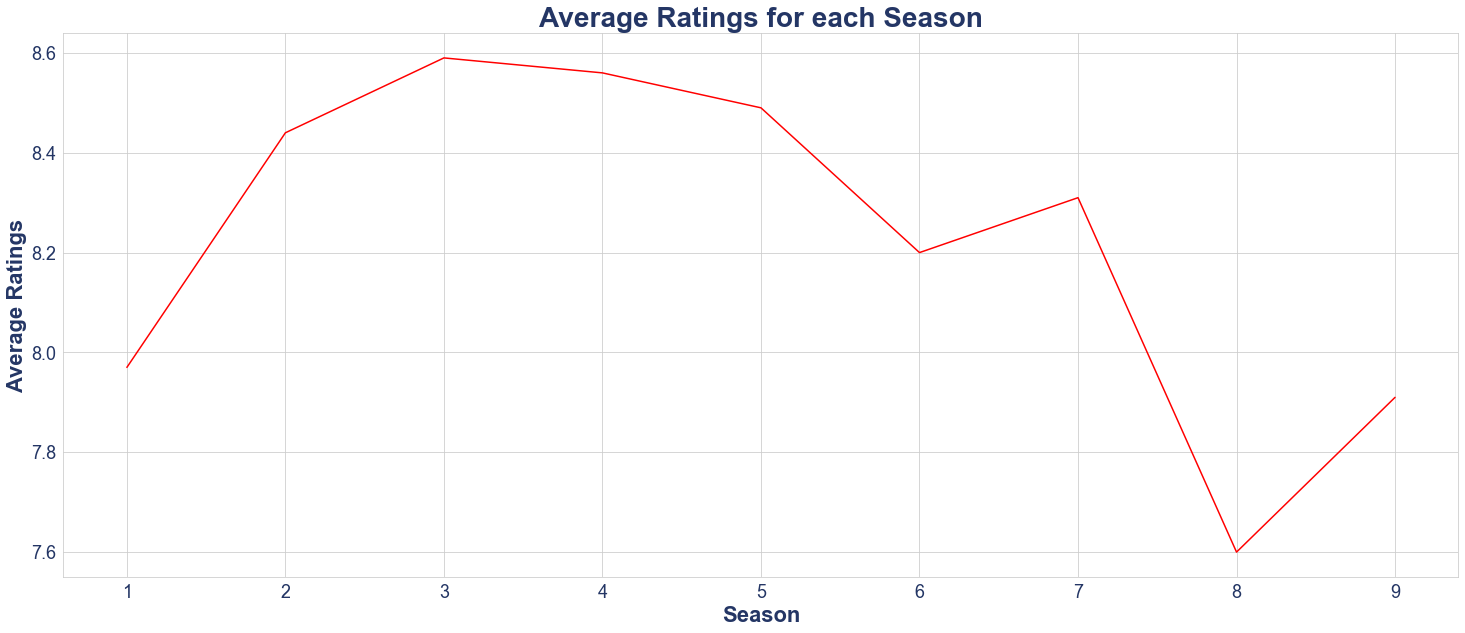

In [17]:
plt.figure(figsize=(25,10))
sns.lineplot(x=avg_r_season.Season, y=avg_r_season.avg_r_episode, color = "red" )
plt.title('Average Ratings for each Season', fontsize=28, fontweight='bold',color = '#243665')
plt.xlabel('Season', fontsize=22, fontweight='bold',color = '#243665')
plt.ylabel('Average Ratings', fontsize=22, fontweight='bold',color = '#243665')
plt.xticks(fontsize=18,color = '#243665')
plt.yticks(fontsize=18,color = '#243665')


## Total duration for each Season

In [18]:
total_duration_season = gpandsql("""
    WITH cte1 as (SELECT DISTINCT Season as Season,  SUM(Duration) OVER(PARTITION BY Season) AS duration
FROM series_df
ORDER BY Season)

SELECT Season, ROUND(duration,2) as dur_r_episode
FROM cte1
"""
)
total_duration_season


,Season,dur_r_episode
0,1,137.0
1,2,498.0
2,3,593.0
3,4,455.0
4,5,751.0
5,6,755.0
6,7,746.0
7,8,552.0
8,9,599.0


In [19]:
total_duration = gpandsql("""
SELECT SUM(Duration) AS duration
FROM series_df

"""
)
total_duration

,duration
0,5086


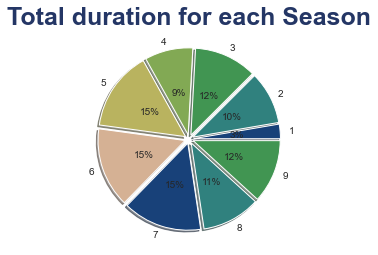

In [20]:

palette_color = sns.color_palette('gist_earth')


plt.pie(total_duration_season.dur_r_episode, labels = total_duration_season.Season, colors = palette_color, autopct='%.0f%%', explode=[0.05]*9,pctdistance=0.5, shadow =True)
plt.title('Total duration for each Season', fontsize=25, fontweight='bold',color = '#243665')
plt.show()

## Guest Appearance for each Season

In [21]:
## No. of GuestStars appeared in each Season

guest_stars_appeared = gpandsql("""
    WITH cte1 as (SELECT DISTINCT Season as Season, COUNT(GuestStars) OVER(PARTITION BY Season) AS guests
FROM series_df
ORDER BY Season)

SELECT Season, guests as No_GuestStars
FROM cte1

"""
)
guest_stars_appeared

,Season,No_GuestStars
0,1,1
1,2,6
2,3,1
3,4,1
4,5,3
5,6,3
6,7,5
7,8,3
8,9,6


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(0, 1, '2'),
  Text(0, 2, '3'),
  Text(0, 3, '4'),
  Text(0, 4, '5'),
  Text(0, 5, '6'),
  Text(0, 6, '7'),
  Text(0, 7, '8'),
  Text(0, 8, '9')])

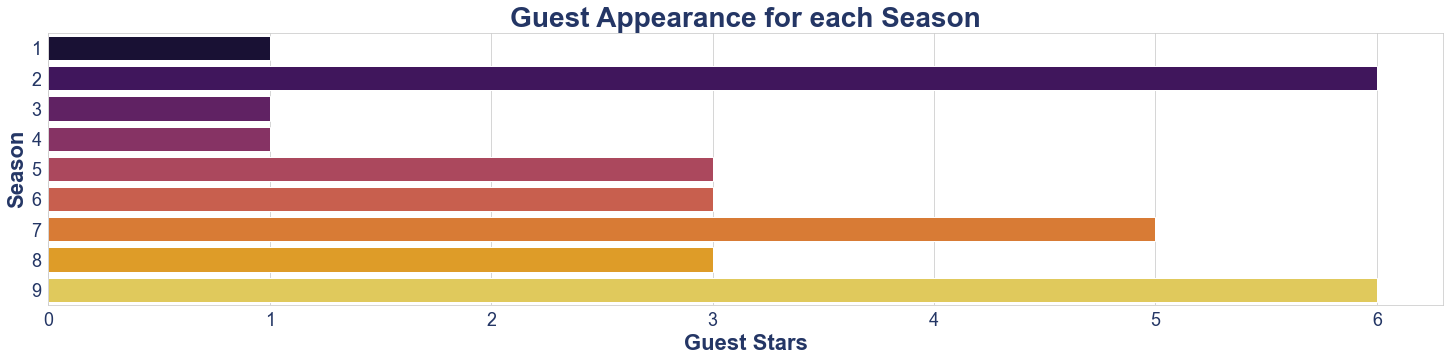

In [22]:
plt.figure(figsize=(25,5))
sns.barplot(y=guest_stars_appeared.Season, x=guest_stars_appeared.No_GuestStars, palette='inferno', orient = 'h')
plt.title('Guest Appearance for each Season', fontsize=28, fontweight='bold', color = '#243665')
plt.xlabel('Guest Stars', fontsize=22, fontweight='bold', color = '#243665')
plt.ylabel('Season', fontsize=22, fontweight='bold',color = '#243665')
plt.xticks(np.arange(0,7,1),fontsize=18,color = '#243665')
plt.yticks(fontsize=18,color = '#243665')


## Top 10 Directors

In [23]:
## top 10 Directors and Writers with highest ratings


top_5_dir = gpandsql("""
with cte1 as (SELECT Director, EpisodeTitle, 
--Season,EpisodeTitle, 
MAX(Ratings) AS max_ratings
FROM series_df
GROUP BY Director
--,Season, EpisodeTitle
ORDER BY max_ratings DESC
limit 10)

select  Director, EpisodeTitle, 
--Season, EpisodeTitle, 
max_ratings
from cte1
order by max_ratings desc
"""
)
top_5_dir

,Director,EpisodeTitle,max_ratings
0,Paul Feig,"Goodbye, Michael",9.8
1,Ken Kwapis,Finale,9.8
2,Jeffrey Blitz,Stress Relief,9.7
3,David Rogers,A.A.R.M.,9.5
4,Tucker Gates,Threat Level Midnight,9.4
5,Steve Carell,Garage Sale,9.3
6,Harold Ramis,Beach Games,9.2
7,Bryan Gordon,The Injury,9.1
8,Rainn Wilson,Classy Christmas,9.0
9,Mindy Kaling,Michael's Last Dundies,9.0


(7.0, 10.290000000000001)

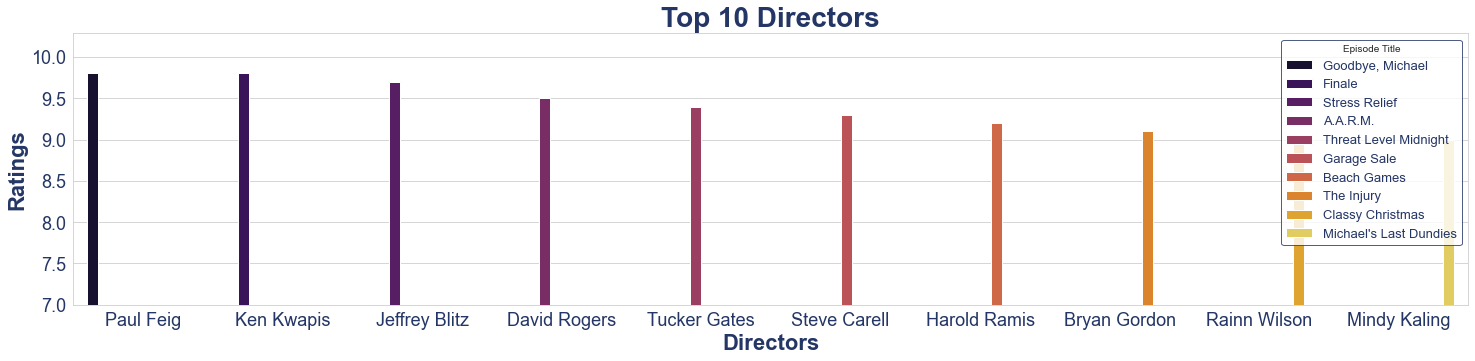

In [24]:
plt.figure(figsize=(25,5))
sns.barplot(y=top_5_dir.max_ratings, x=top_5_dir.Director, palette='inferno', hue = top_5_dir.EpisodeTitle)
plt.legend(labelcolor = '#243665', edgecolor='#243665', title='Episode Title', fontsize=13)

plt.title('Top 10 Directors', fontsize=28, fontweight='bold',color = '#243665')
plt.xlabel('Directors', fontsize=22, fontweight='bold',color = '#243665')
plt.ylabel('Ratings', fontsize=22, fontweight='bold',color = '#243665')
plt.xticks(fontsize=18,color = '#243665')
plt.yticks(fontsize=18,color = '#243665')
plt.ylim(bottom = 7)

## Top 10 Writers

In [25]:
top_writers = gpandsql("""
with cte1 as (SELECT Writers, EpisodeTitle, MAX(Ratings) AS max_ratings
FROM series_df
GROUP BY  Writers, EpisodeTitle
ORDER BY max_ratings DESC
LIMIT 10)

select distinct Writers,EpisodeTitle, max_ratings
from cte1
"""
)
top_writers

,Writers,EpisodeTitle,max_ratings
0,Greg Daniels,Finale,9.8
1,Greg Daniels,"Goodbye, Michael",9.8
2,Paul Lieberstein,Stress Relief,9.7
3,Brent Forrester,A.A.R.M.,9.5
4,Gene Stupnitsky | Lee Eisenberg,Dinner Party,9.5
5,B. J. Novak,Threat Level Midnight,9.4
6,Greg Daniels | Mindy Kaling,Niagara: Part 1,9.4
7,Greg Daniels | Mindy Kaling,Niagara: Part 2,9.4
8,Steve Carell,Casino Night,9.4
9,Jennifer Celotta | Paul Lieberstein,"Goodbye, Toby",9.3


(7.0, 10.290000000000001)

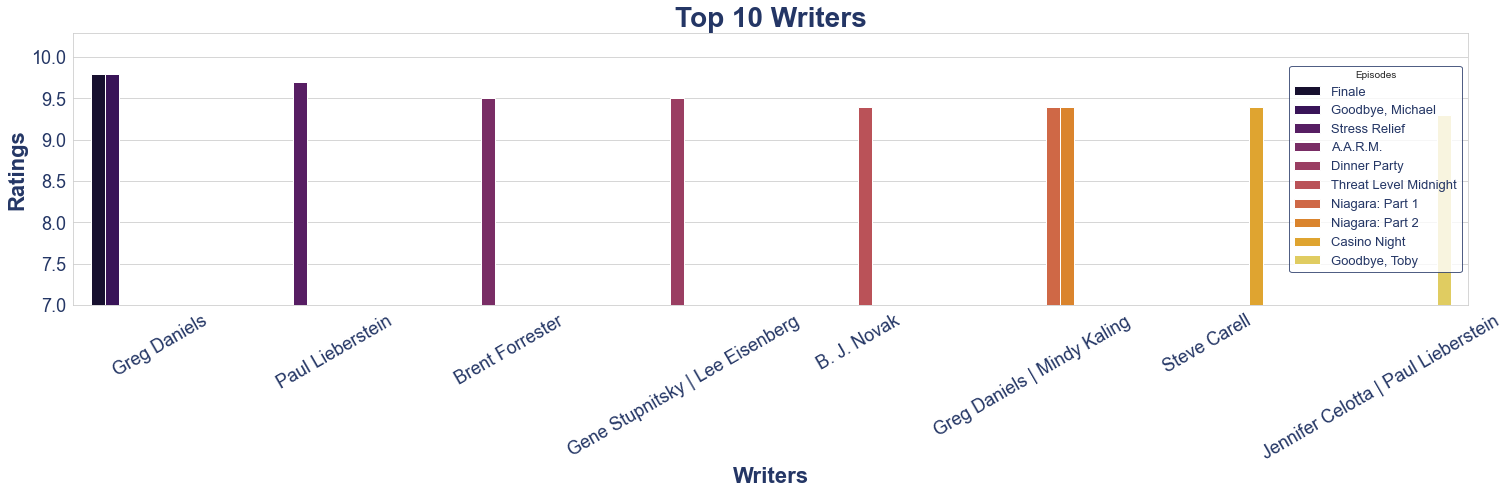

In [26]:
plt.figure(figsize=(25,5))
sns.barplot(y=top_writers.max_ratings, x=top_writers.Writers, palette='inferno', hue = top_writers.EpisodeTitle)
plt.legend(loc='center right', title='Episodes', fontsize=13, labelcolor = '#243665', edgecolor='#243665')
plt.title('Top 10 Writers', fontsize=28, fontweight='bold',color = '#243665')
plt.xlabel('Writers', fontsize=22, fontweight='bold',color = '#243665')
plt.ylabel('Ratings', fontsize=22, fontweight='bold',color = '#243665')
plt.xticks(fontsize=18, rotation =30,color = '#243665')
plt.yticks(fontsize=18,color = '#243665')
plt.ylim(bottom = 7)

## Average Views

In [27]:

avg_viewership = gpandsql("""
SELECT avg(Viewership) AS avg_viewership
FROM series_df

"""
)
avg_viewership

,avg_viewership
0,7.24633


## Average Votes

In [28]:
avg_votes = gpandsql("""
SELECT avg(Votes) AS avg_votes
FROM series_df

"""
)
avg_votes

,avg_votes
0,2838.228723


## Average Ratings

In [29]:
avg_rating = gpandsql("""
SELECT avg(Ratings) AS avg_rating
FROM series_df
limit 1
"""
)
avg_rating

,avg_rating
0,8.237234


## Average Duration

In [30]:
avg_duration = gpandsql("""
SELECT avg(Duration) AS avg_duration
FROM series_df

"""
)
avg_duration

,avg_duration
0,27.053191


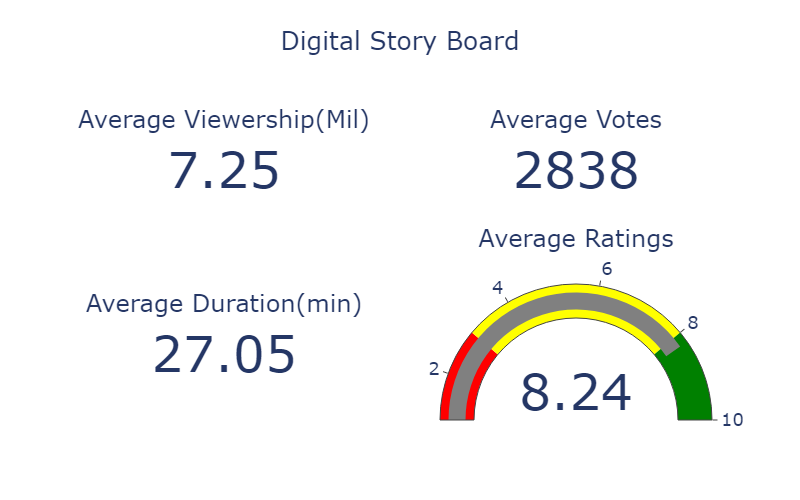

In [31]:
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'indicator'},{'type': 'indicator'}],
          [ {'type': 'indicator'} , {'type': 'indicator'}]])

fig.add_trace(go.Indicator(
    mode = 'number',
    value = avg_votes.avg_votes[0],
    number={'font':{'color': '#243665','size':50}},
    domain = {'x': [0.05, 0.5], 'y': [0.15, 0.35]},
   
    title = {'text': "Average Votes", 'font': {'size': 24}},),row=1, col=2) 

fig.add_trace(go.Indicator(
    mode = 'number',
    value = avg_viewership.avg_viewership[0],
    number={'font':{'color': '#243665','size':50}},
    domain = {'x': [0, 0.5], 'y': [0, 0.5]},
    
     title = {'text': "Average Viewership(Mil)", 'font': {'size': 24}},),row=1, col=1)

fig.add_trace(go.Indicator(
    mode = 'number',
    value = avg_duration.avg_duration[0],
    number={'font':{'color': '#243665','size':50}},
    domain = {'x': [0, 0.5], 'y': [0, 0.5]},
    
     title = {'text': "Average Duration(min)", 'font': {'size': 24}},),row=2, col=1)




fig.add_trace(go.Indicator(
    mode = 'gauge+number',
    value = avg_rating.avg_rating[0],
    number={'font':{'color': '#243665','size':50}},
    domain = {'x': [0, 0.5], 'y': [0, 0.5]},
    gauge = {'axis': {'range': [1, 10]},
             'bar': {'color': "gray"},
             'steps' : [
                 {'range': [1, 3], 'color': "red"},
                 {'range': [3, 8], 'color': "yellow"},
             {'range': [8, 10], 'color': "green"}]},
     title = {'text': "Average Ratings", 'font': {'size': 24}},),row=2, col=2)

fig.update_layout(
    title_text='Digital Story Board',
    template='simple_white',
    title_x=0.5,font=dict(
        size=18,
        color = '#243665'
    ))

fig.update_layout(
    autosize=False,
    width=800,
    height=500,)

## "That's what she said!!!"

![That's what she said](https://media0.giphy.com/media/IjJ8FVe4HVk66yvlV2/giphy.gif?cid=ecf05e47zu7z827f0qdl26qb86lwxtlkaxraf0ouax31wiuk&rid=giphy.gif&ct=g)

In [32]:
# number of times "That's what she said!" joke cracked in the show

thats_what_she_said = gpandsql("""
SELECT COUNT(line_text) AS thats_what_she_said
FROM scripts__df
WHERE line_text LIKE '%what she said%'
"""
)
thats_what_she_said

,thats_what_she_said
0,38


In [33]:
# number of times "That's what she said!" joke cracked by Michael

m_twss = gpandsql("""
SELECT COUNT(line_text) AS m_twss
FROM scripts__df
WHERE line_text LIKE '%what she said%' AND speaker = 'Michael'
"""
)
m_twss

,m_twss
0,25


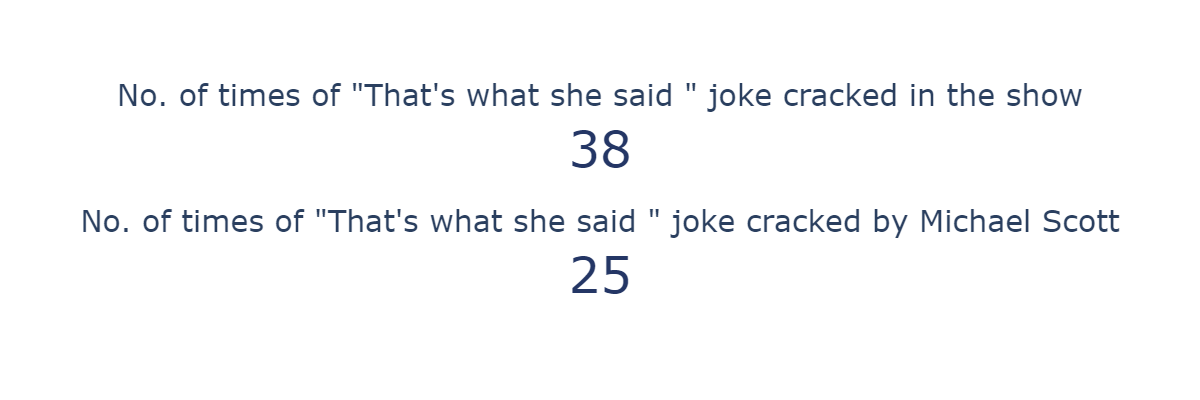

In [34]:
fig = make_subplots(
    rows=2, cols=1,
    specs=[[{'type': 'indicator'}],
          [ {'type': 'indicator'} ]])


fig.add_trace(go.Indicator(
    mode = 'number',
    value = thats_what_she_said.thats_what_she_said[0],
    number={'font':{'color': '#243665','size':50}},
    domain = {'x': [0.05, 0.5], 'y': [0.15, 0.35]},
   
    title = {'text': "No. of times of \"That's what she said \" joke cracked in the show", 'font': {'size': 30}},)
              ,row=1, col=1) 

fig.add_trace(go.Indicator(
    mode = 'number',
    value = m_twss.m_twss[0],
    number={'font':{'color': '#243665','size':50}},
    domain = {'x': [0.5, 0.5], 'y': [0, 0.5]},
    
     title = {'text': "No. of times of \"That's what she said \" joke cracked by Michael Scott", 'font': {'size': 30}},),row=2, col=1)



fig.update_layout(
    autosize=True,
    width=1200,
    height=400,)

## "Cookies"

In [35]:
# number of times kevin spoke about cookies

cookie = gpandsql("""
SELECT COUNT(line_text) AS cookie
FROM scripts__df
WHERE line_text LIKE '%cookies%' AND speaker = 'Kevin' OR speaker = 'Cookie Monster'
"""
)
cookie

,cookie
0,12


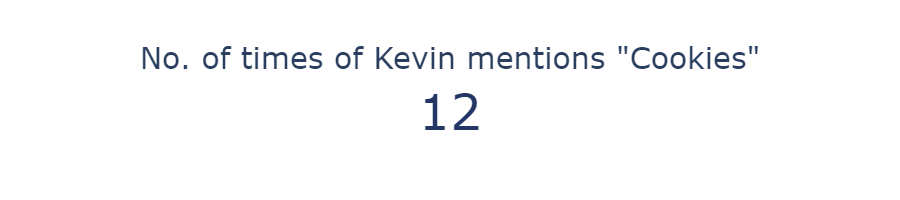

In [36]:
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{'type': 'indicator'}]])


fig.add_trace(go.Indicator(
    mode = 'number',
    value = cookie.cookie[0],
    number={'font':{'color': '#243665','size':50}},
    domain = {'x': [0.05, 0.5], 'y': [0.15, 0.35]},
   
    title = {'text': "No. of times of Kevin mentions \"Cookies\"", 'font': {'size': 30}},)
              ,row=1, col=1) 


fig.update_layout(
   
    width=900,
    height=200,)

## "Cornell"

![Cornell](https://media2.giphy.com/media/kMPP27oGmW36oZ6olx/giphy.gif?cid=ecf05e4779xswpdxhh4ijnul0wrgpksw6gp4b4t9w3anou92&rid=giphy.gif&ct=g)

In [37]:
# number of times Andy mentioning  'Cornell' college

cornell = gpandsql("""
SELECT COUNT(line_text) AS cornell
FROM scripts__df
WHERE line_text LIKE '%cornell%' AND speaker = 'Andy' 
"""
)
cornell

,cornell
0,33


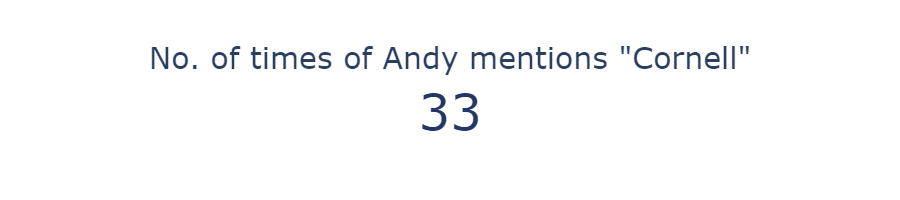

In [38]:
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{'type': 'indicator'}]])


fig.add_trace(go.Indicator(
    mode = 'number',
    value = cornell.cornell[0],
    number={'font':{'color': '#243665','size':50}},
    domain = {'x': [0.05, 0.5], 'y': [0.15, 0.35]},
   
    title = {'text': "No. of times of Andy mentions \"Cornell\"", 'font': {'size': 30}},)
              ,row=1, col=1) 

fig.update_layout(
   
    width=900,
    height=200,)

## "Tuna!"

![Tuna](https://64.media.tumblr.com/tumblr_m5fgkh1Zv31qcti48o6_r1_250.gifv)

In [39]:
# number of times Andy calling Jim Tuna

tuna = gpandsql("""
SELECT COUNT(line_text) AS tuna
FROM scripts__df
WHERE line_text LIKE '%tuna%' AND speaker = 'Andy' 
"""
)
tuna

,tuna
0,63


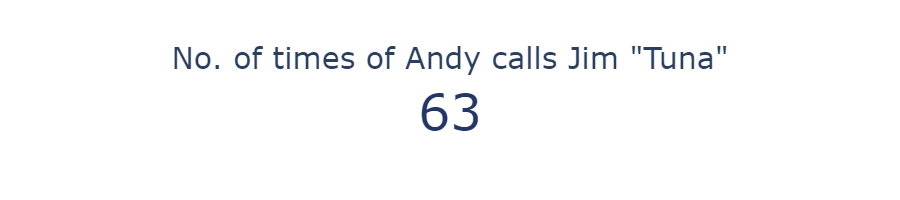

In [40]:
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{'type': 'indicator'}]])


fig.add_trace(go.Indicator(
    mode = 'number',
    value = tuna.tuna[0],
    number={'font':{'color': '#243665','size':50}},
    domain = {'x': [0.05, 0.5], 'y': [0.15, 0.35]},
   
    title = {'text': "No. of times of Andy calls Jim \"Tuna\"", 'font': {'size': 30}},)
              ,row=1, col=1) 

fig.update_layout(
   
    width=900,
    height=200,)

## Fun office? Why not ~ "Prank"
![Prank](https://media1.giphy.com/media/pmVBMVIXDwj0A/giphy.gif?cid=ecf05e479qm88k12jtvcynibsoj13ba0o2ujgxodibml5yuh&rid=giphy.gif&ct=g)

In [41]:
# number of times employees talking about prank
prank = gpandsql("""
SELECT COUNT(line_text) AS prank
FROM scripts__df
WHERE line_text LIKE '%prank%' 
"""
)
prank

,prank
0,45


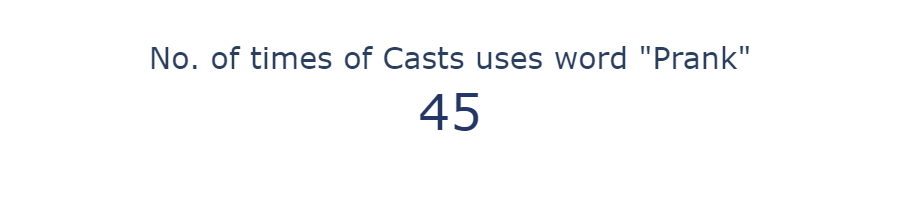

In [42]:
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{'type': 'indicator'}]])


fig.add_trace(go.Indicator(
    mode = 'number',
    value = prank.prank[0],
    number={'font':{'color': '#243665','size':50}},
    domain = {'x': [0.05, 0.5], 'y': [0.15, 0.35]},
   
    title = {'text': "No. of times of Casts uses word \"Prank\"", 'font': {'size': 30}},)
              ,row=1, col=1) 

fig.update_layout(
   
    width=900,
    height=200,)

## Dwight's love towards his "Farm"

![Farm](https://media4.giphy.com/media/dXf93EHY6advUBYC0u/giphy.gif?cid=ecf05e47vuvkddl3kvfowyk080p3b9kpbzsx0dd9igrum1e6&rid=giphy.gif&ct=g)

In [43]:
# number of times Dwight mentioning about his farm
farm = gpandsql("""
SELECT COUNT(line_text) AS farm
FROM scripts__df
WHERE line_text LIKE '%farm%' AND speaker = 'Dwight' 
"""
)
farm

,farm
0,56


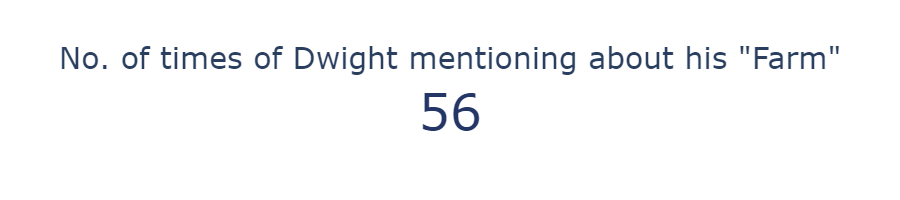

In [44]:
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{'type': 'indicator'}]])


fig.add_trace(go.Indicator(
    mode = 'number',
    value = farm.farm[0],
    number={'font':{'color': '#243665','size':50}},
    domain = {'x': [0.05, 0.5], 'y': [0.15, 0.35]},
   
    title = {'text': "No. of times of Dwight mentioning about his \"Farm\"", 'font': {'size': 30}},)
              ,row=1, col=1) 

fig.update_layout(
   
    width=900,
    height=200,)

## Dwight and his "Facts"
![Facts](https://media.tenor.com/WyP87R3evT4AAAAC/facts-dwight-facts.gif)

In [45]:
# number of times Dwight saying fact
fact = gpandsql("""
SELECT count(line_text) as fact
FROM scripts__df
WHERE line_text LIKE '%fact%' AND speaker = 'Dwight' 
AND line_text NOT LIKE '%benefactor%'
AND line_text NOT LIKE '%satisfactory%'
AND line_text NOT LIKE '%satisfaction%' 
"""
)
fact

,fact
0,26


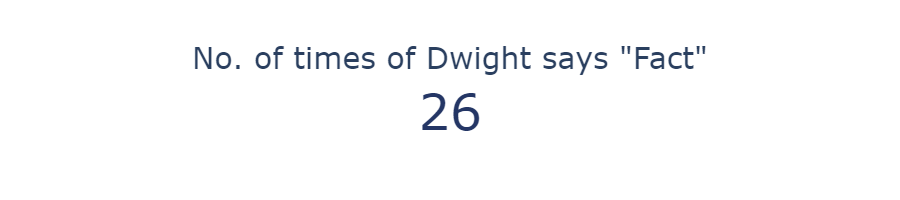

In [46]:
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{'type': 'indicator'}]])


fig.add_trace(go.Indicator(
    mode = 'number',
    value = fact.fact[0],
    number={'font':{'color': '#243665','size':50}},
    domain = {'x': [0.05, 0.5], 'y': [0.15, 0.35]},
   
    title = {'text': "No. of times of Dwight says \"Fact\"", 'font': {'size': 30}},)
              ,row=1, col=1)

fig.update_layout(
   
    width=900,
    height=200,)

## Dwight and Angela

![Monkey](https://64.media.tumblr.com/54492a8ae215a8a85c7c43a78c5c3d42/tumblr_o7xb0kWA6p1uk9x9no9_250.gif)

In [47]:
# number of times Dwight calling Angela 'Monkey'
monkey = gpandsql("""
SELECT count(line_text) as monkey
FROM scripts__df
WHERE line_text LIKE '%monkey%' AND speaker = 'Dwight' AND season NOT IN (1,2,8)
"""
)
monkey

,monkey
0,16


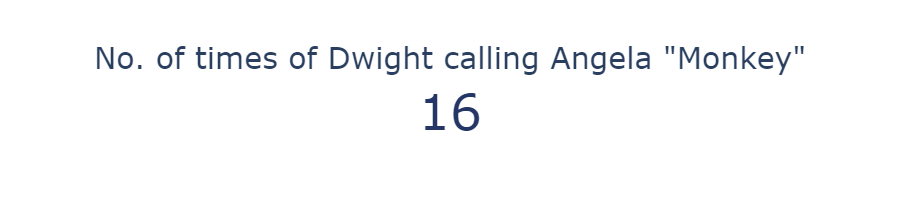

In [48]:
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{'type': 'indicator'}]])


fig.add_trace(go.Indicator(
    mode = 'number',
    value = monkey.monkey[0],
    number={'font':{'color': '#243665','size':50}},
    domain = {'x': [0.05, 0.5], 'y': [0.15, 0.35]},
   
    title = {'text': "No. of times of Dwight calling Angela \"Monkey\"", 'font': {'size': 30}},)
              ,row=1, col=1)

fig.update_layout(
   
    width=900,
    height=200,)